In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_income = pd.read_csv('data/clustering.csv')
df_income

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [2]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [3]:
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [4]:
scaler = StandardScaler()

column_names = df_income.columns.tolist()

print(column_names)

['INCOME', 'SPEND']


In [5]:
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace = True)
df_income


,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939
...,...,...
298,-0.088269,-1.165281
299,0.386748,-0.771706
300,-1.079609,-0.378132
301,-2.360090,-1.515125


Text(0, 0.5, 'Annual Spend')

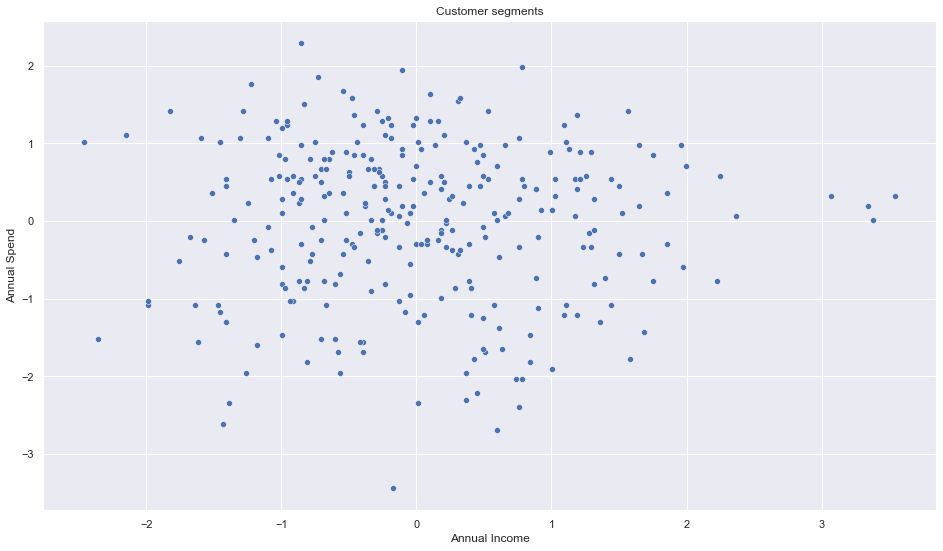

In [6]:
sns.set()
plt.rcParams['figure.figsize'] = (16,9)

sns.scatterplot(x = 'INCOME', y = 'SPEND', data = df_income)
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

In [22]:
kmeans = KMeans(n_clusters = 4,init='k-means++', max_iter=300,n_init=10,random_state = 0)
income = df_income[['INCOME','SPEND']]
cluster = kmeans.fit_predict(income)
cluster

array([0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 1, 3, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 1, 3, 0, 1, 0, 1, 1, 1, 0, 3, 1,
       1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 3, 0, 0,
       3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 3, 3, 3, 2, 1, 1, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 1,
       0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 3, 1, 1, 0, 1, 0, 1, 0, 3, 3,
       0, 1, 3, 2, 1, 3, 1, 0, 3, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 1, 3, 0,
       2, 0, 0, 1, 2, 1, 3, 0, 3, 1, 3, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       1, 3, 1, 2, 3, 3, 2, 3, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 0, 0, 0, 0, 2, 1,
       3, 3, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 3, 1, 1, 3, 2, 0, 3, 0, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 0, 3, 3, 3, 3, 3, 2, 3,

In [28]:
df_income['cluster'] = cluster
df_income

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
1,0.097607,1.633471,0
2,-0.852427,0.977514,0
3,-0.191534,1.239897,0
4,2.245510,0.583939,1
...,...,...,...
298,-0.088269,-1.165281,3
299,0.386748,-0.771706,2
300,-1.079609,-0.378132,3
301,-2.360090,-1.515125,3


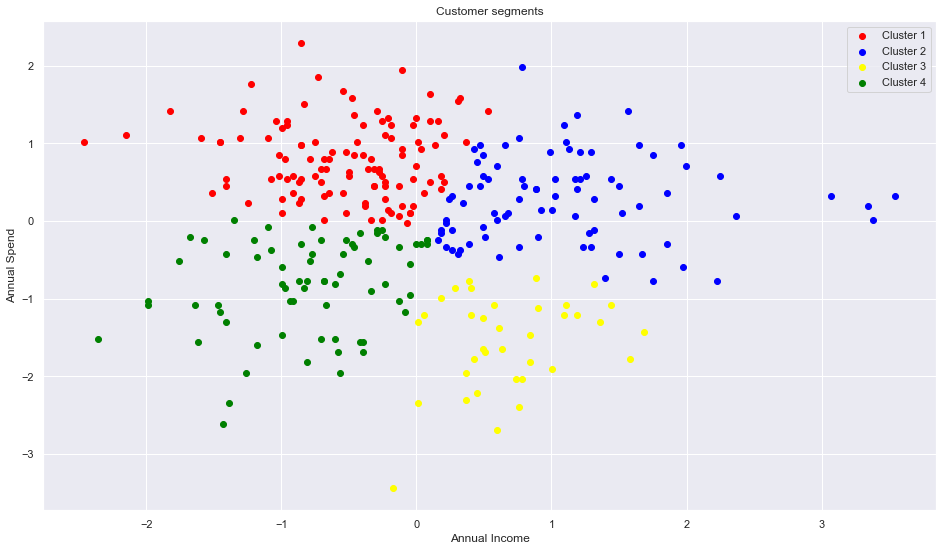

In [33]:
df_income1 = df_income[df_income.cluster == 0]
df_income2 = df_income[df_income.cluster == 1]
df_income3 = df_income[df_income.cluster == 2]
df_income4 = df_income[df_income.cluster == 3]

plt.scatter(df_income1['INCOME'], df_income1['SPEND'], color='red', label='Cluster 1')
plt.scatter(df_income2['INCOME'], df_income2['SPEND'], color='blue', label='Cluster 2')
plt.scatter(df_income3['INCOME'], df_income3['SPEND'], color='yellow', label='Cluster 3')
plt.scatter(df_income4['INCOME'], df_income4['SPEND'], color='green', label='Cluster 4')

plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()